<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/03_linear_regression/2_linear_regression_theorie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

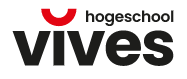<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# LINEAIRE REGRESSIE: THEORIE

In deze notebook bespreken we **lineaire regressie**, waarbij we ons vooral focussen op enkelvoudige lineaire regressie met 2 variabelen. Naast het vinden van de exacte oplossing met de kleinste-kwadratenmethode, tonen we ook hoe we **Gradient Descent** kunnen toepassen om een benaderende oplossing te vinden.

Het Gradient Descent algoritme wordt ook gebruikt bij het trainen van andere machine learning modellen, en komt dus verder in de cursus meerdere malen aan bod. Het wordt zelfs toegepast bij artificiële neurale netwerken, en het is daarom ook een belangrijk topic in het vak Deep Learning.

Maar om het Gradient Descent algoritme goed te kunnen snappen, moeten we eerst begrijpen wat een gradiënt juist is in de wiskunde.

## Gradiënt van een functie

### Wat is een gradiënt?

Een **gradiënt** geeft weer hoe een bepaalde grootheid verloopt in functie van een andere grootheid. Denk bijvoorbeeld aan een kleurengradiënt die het verloop van een kleur weergeeft in functie van de plaats, zoals bijvoorbeeld onderstaande figuur de continue overgang van magenta naar geel weergeeft:

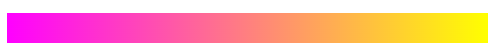

De snelheid is een ander voorbeeld, want dit drukt het verloop van het aantal afgelegde kilometers uit in functie van de tijd. Vandaar dat de eenheid van snelheid kilometers per uur is.

Hieronder zie je een voorbeeld. Op de grafiek wordt de afgelegde afstand in km uitgezet tegenover de tijd in uren die nodig was om die afstand af te leggen:

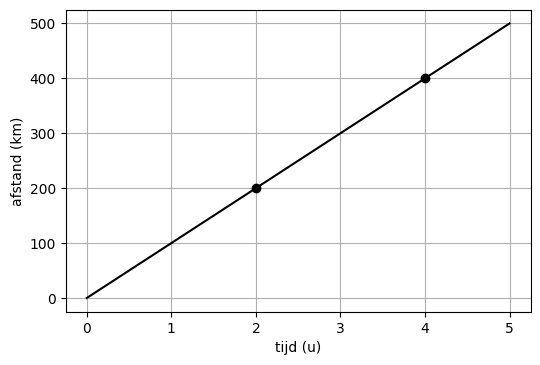

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100  # zal de figuren wat groter maken

afstanden = np.arange(0, 600, 100)  # reeks afstanden van 0 t.e.m. 500km met stappen van 100km
tijden = np.arange(0, 6, 1)  # reeks tijden van 0 t.e.m. 5u met stappen van 1u

plt.plot(tijden, afstanden, 'k-');
plt.plot([2, 4], [200, 400], 'ko');  # 2 punten op de rechte
plt.xlabel("tijd (u)");
plt.ylabel("afstand (km)");
plt.grid();

We kunnen nu de snelheid berekenen aan de hand van de grafiek. We lezen eerst twee willekeurige punten af, bijv. (2, 200) en (4, 400). M.b.v. die punten kunnen we nu de snelheid als volgt berekenen:

> $snelheid = \frac{afstand_2 - afstand_1}{tijd_2 - tijd_1}$

Wanneer we de coördinaten van de 2 punten invullen, dan krijgen we:

> $snelheid = \frac{400 km - 200 km}{4u - 2u} = 100 km/u$

We hadden ook gewoon 1 punt kunnen nemen, bijv. 400 / 4, omdat de rechte door de oorsprong gaat. In dit geval is het 2de punt (0, 0), want na 0 uren hebben we inderdaad 0 km afgelegd. Merk ook op dat de snelheid constant is, vandaar dat we deze formule mogen toepassen met 2 willekeurige punten op de rechte. Maar we mogen dat niet doen als het verband tussen afstand en tijd niet door een rechte kan weergegeven worden!

### Lineair verband

In de wiskunde geeft de gradiënt de richting aan waarin een **functie** het sterkst varieert en hoe groot die variatie is. Wanneer het om een functie gaat in twee dimensies, dan noemen we die gradiënt de **afgeleide**. Het eenvoudigste voorbeeld van een 2D functie is een rechte, en in dat geval is die afgeleide de **richtingscoëfficiënt**, afgekort rico. In ons voorbeeld krijgen we dus ook een rechte wanneer we de afstand uitzetten in functie van de tijd. We zeggen dat het verband tussen afstand en tijd **lineair** is.

De algemene vergelijking van een **rechte** is:

> $y = ax + b$

We noemen $y$ de **afhankelijke variabele**, $x$ de **onafhankelijke variabele**, $a$ de **richtingscoëfficiënt** en $b$ de **intercept**, d.i. het snijpunt van de rechte met de y-as. In ons voorbeeld is $y$ de afstand, $x$ de tijd, $a$ de snelheid, en $b$ de beginafstand die hier nul is. We krijgen dus de volgende vergelijking:

> $y = 100 x$

Deze vergelijking is een functie $y$ met variabele $x$. Het drukt dus een verband uit tussen variabelen $x$ en $y$. Omdat er maar 1 onafhankelijke variabele is, kunnen we de functie in een tweedimensionaal (x,y)-assenstelsel voorstellen. In ons voorbeeld drukt de functie het linaire verband uit tussen tijd en afstand. We zeggen ook dat de afstand een functie is van de tijd. We noteren dit als $y(x)$.

We kunnen ook andere symbolen nemen voor de variabelen, en in de fysica stelt men de afstand vaak voor met $x$, de tijd met $t$, en de snelheid met $v$. We krijgen dan:

> $x = v t$

Dit is natuurlijk een beetje verwarrend, omdat hier de afhankelijke variabele $y$ de afstand $x$ is, en de onafhankelijke variabele $x$ de tijd $t$. De rico $a$ is trouwens snelheid $v$.

De **afgeleide** van $y$ naar $x$ wordt genoteerd als:

> $y'(x) = \frac{dy}{dx}$

In ons voorbeeld is dat dus de afgeleide van de afstand naar de tijd, wat de snelheid is. In het geval van een rechte is die afgeleide eenvoudigweg de richtingscoëfficiënt:

> $\frac{dy}{dx} = a$

Of gebruik makend van de symbolen uit de fysica:

> $\frac{dx}{dt} = v$

Het drukt uit hoeveel $y$ verandert wanneer $x$ één eenheid toeneemt. In ons voorbeeld drukt de afgeleide uit hoeveel afstand erbij komt wanneer we 1 u verder zijn. Fysisch gezien is dit dus de snelheid. Grafisch is de rico de helling van de rechte: is de rico positief, dan stijgt de rechte; is de rico negatief, dan daalt de rechte; is de rico 0, dan is de rechte horizontaal. De grootte van de rico geeft ook aan hoeveel die rechte stijgt of daalt.

Die $dy$ en $dx$ mag je effectief als verschillen zien, al zijn het oneindig kleine verschillen in één punt. In het geval van een rechte zijn die verschillen in alle punten dezelfde, dus de afgeleide is constant, en daarom kunnen we schrijven:

> $\frac{dy}{dx} = \frac{\Delta y}{\Delta x} = \frac{y_2-y_1}{x_2-x_1}$

waarbij we twee willekeurige punten $(x_1, y_1)$ en $(x_2, y_2)$ op de rechte nemen. Dat is exact hoe we hierboven de snelheid hebben berekend. In de figuur wordt dat ook nog eens grafisch weergegeven.

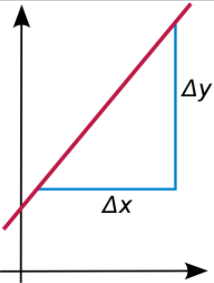

### Niet-lineair verband

Het wordt iets moeilijker natuurlijk als ons verband tussen variabelen $x$ en $y$ niet lineair is. Dan krijgen we geen rechte maar een kromme. Keren we terug naar ons snelheidsvoorbeeld, maar stel dat we deze keer traag starten, en dan alsmaar gaan versnellen, zoals op onderstaande grafiek:

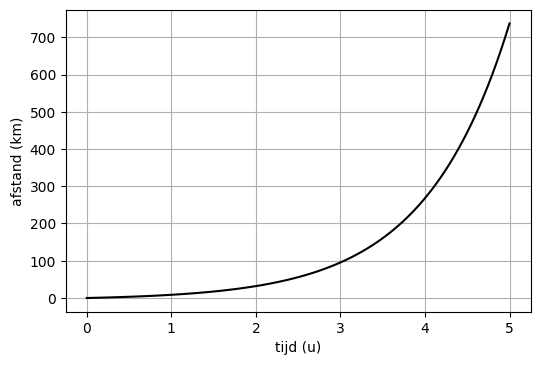

In [ ]:
tijden = np.linspace(0, 5, 100)  # reeks van 100 tijden van 0 t.e.m. 5u
afstanden = 5 * np.exp(tijden) - 5  # exponentiële toename van de afstand ifv de tijd

plt.plot(tijden, afstanden, 'k-');
plt.xlabel("tijd (u)");
plt.ylabel("afstand (km)");
plt.grid();

Wat is nu de snelheid na 2u rijden? Gelukkig weten we in dit voorbeeld wat het verband is tussen afstand $y$ en snelheid $x$:

> $y = 5e^x - 5$

Of gebruik makend van de symbolen uit de fysica:

> $x = 5e^t - 5$

Symbool $e$ staat voor de constante van Euler, maar in Python kunnen we eenvoudig gebruik maken van NumPy functie `exp`.

Om de snelheid te weten moeten we de afgeleide nemen van de afstand naar de tijd:

> $\frac{dy}{dx} = 5e^x$

Of met de symbolen uit de fysica:

> $\frac{dx}{dt} = 5e^t$

De afgeleide, in dit geval de snelheid, is niet meer constant, maar ook een functie van de tijd. Nu kunnen we berekenen dat na 2u rijden de snelheid $5e^2$ km/u is:

In [ ]:
print(f"De snelheid na 2u rijden is {5 * np.exp(2) :.2f} km/u")

De snelheid na 2u rijden is 36.95 km/u


De snelheid is dus niet meer constant, en na 4u rijden is de snelheid inderdaad veel groter:

In [ ]:
print(f"De snelheid na 2u rijden is {5 * np.exp(4) :.2f} km/u")

De snelheid na 2u rijden is 272.99 km/u


Bij een kromme is het zo dat de afgeleide in een punt op die kromme de rico is van de **raaklijn** aan de kromme in dat punt. Die raaklijn is een rechte en kan dus ook uitgedrukt worden adhv de vergelijking van een rechte. Omdat we 1 punt kennen, nl. het punt op de kromme, en de rico, nl. de afgeleide in dat punt, kunnen we eenvoudig de vergelijking van de raaklijn opstellen:

> $y = y_1 + \frac{dy_1}{dx_1}(x-x_1)$

waarbij $(x_1, y_1)$ het punt op de kromme is. Laten we dat nu eens plotten voor de 2 punten die overeenkomen met 2u en 4u rijden:

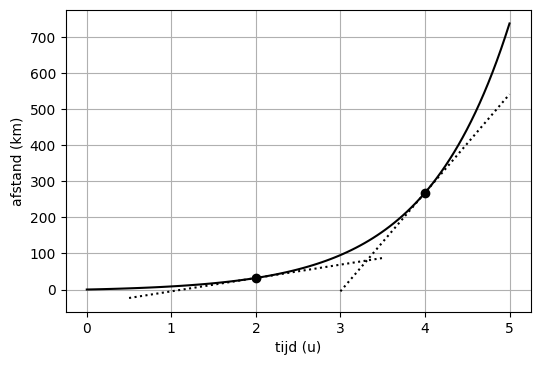

In [ ]:
# gegevens
y = lambda x: 5 * np.exp(x) - 5  # afstand in functie van de tijd
dydx = lambda x: 5 * np.exp(x)   # snelheid in functie van de tijd (= afgeleide van afstand naar tijd)
x1, x2 = 2, 4  # we nemen de 2 punten die overeenkomen met 2u en 4u
y1, y2 = y(x1), y(x2)  # de afstand voor die 2 punten
dy1dx1, dy2dx2 = dydx(x1), dydx(x2)  # de snelheid voor die 2 punten

# vergelijking raaklijn met xlim de 2 x-coördinaten van de uiteinden van de raaklijn
raaklijn = lambda xlim, xpunt, ypunt, rico: ypunt + rico * (xlim - xpunt)

# plot van de curve met daarop de 2 punten
plt.plot(tijden, afstanden, 'k-');
plt.plot([x1, x2], [y1, y2], 'ko');

# raaklijn in eerste punt
xlim1 = np.array([0.5, 3.5])
plt.plot(xlim1, raaklijn(xlim1, x1, y1, dy1dx1), 'k:')
# raaklijn in tweede punt
xlim2 = np.array([3, 5])
plt.plot(xlim2, raaklijn(xlim2, x2, y2, dy2dx2), 'k:')

# labels en grid
plt.xlabel("tijd (u)");
plt.ylabel("afstand (km)");
plt.grid();

We zien dus inderdaad dat de afgeleide in een punt op de kromme gelijk is aan de rico van de raaklijn aan die kromme in dat punt. Dit wil zeggen dat de afgeleide niet alleen aangeeft of de kromme in dat punt stijgt (als de afgeleide groter is dan 0), daalt (als de afgeleide kleiner is dan 0), of horizontaal is (als de afgeleide gelijk is aan 0), maar ook hoeveel die kromme in dat punt stijgt of daalt.


Die manier van redeneren kunnen we uitbreiden naar meer dan 2 dimensies. In dat geval spreken we van de **gradiënt**. Stel dat je een 2D oppervlak hebt in een 3D assenstelsel. In dat geval zijn er 2 onafhankelijke variabelen, en het oppervlak stelt de afhankelijke variabele voor, die een functie is van die 2 onafhankelijke variabelen. We moeten nu de partiële afgeleiden nemen van die functie naar elk van die 2 onafhankelijke variabelen. Die 2 partiële afgeleiden samen noemen we de gradiënt, en ze geven aan hoeveel en in welke richting de kromme in een bepaald punt het meest stijgt of daalt. In 3D kunnen we dat voorstellen als een raakvlak aan het oppervlak in een gegeven punt i.p.v. een raaklijn, zoals bijvoorbeeld hieronder op de figuur te zien is.

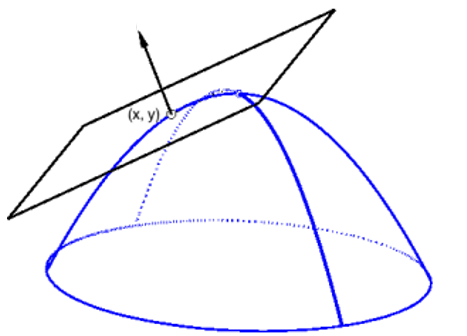

Dat principe kunnen we verder veralgemenen naar N dimensies. **De gradiënt is dus een veralgemening van de afgeleide in N dimensies.**

**Gradient Descent** is een algoritme dat gebruikt maakt van de gradiënt om de kleinst mogelijke fout te vinden bij het trainen van een machine learning model. Hoe dat juist in zijn werk gaat, wordt in de volgende hoofdstukken uitgelegd aan de hand van enkelvoudige lineaire regressie.

## Enkelvoudige lineare regression

### Wat is lineaire regressie?

Bij **lineaire regressie** gaan we uit van een lineair verband tussen de features van onze data en de te voorspellen target. Het achterliggende wiskundig model is dus:

> $y_i = a_0 + a_1 x_{i1} + a_2 x_{i2} + ... + a_N x_{iN}$

met $x_1$, $x_2$, ..., $x_N$ de $N$ **features** en $y$ de **target**. Subscript $i$ verwijst naar het $i$-de **datapunt**. De coëfficiënten $a_0$, $a_1$, $a_2$, ..., $a_N$ zijn de **parameters**. Het zijn die $N+1$ parameters die we moeten afleiden o.b.v. een gegeven dataset. Dus eigenlijk is lineaire regressie niets anders dan voorspellingen maken door een **gewogen som** van alle features te nemen.

Stel dat we een dataset in Excel hebben, dan zijn de kolommen de features. Een voorspelling maken m.b.v. lineaire regressie zou betekenen dat we eerst elke kolom met een gewicht vermenigvuldigen, en daarna alle omgezette kolommen bij elkaar optellen.

Om het hier eenvoudig te houden, starten we met één feature. Dat noemen we **enkelvoudige lineaire regressie**, in het Engels simple linear regression. Dat is dus lineaire regressie toegepast op een dataset met één onafhankelijke variabele $x$ en één afhankelijke variabele $y$. In dit geval zoeken we de best passende rechte om **target** $y$ te kunnen voorspellen o.b.v. **feature** $x$. Die **voorspelling** of predictie wordt vaak aangeduid als $\hat{y}$, dus $y$ met een 'hoedje' boven.



Als we lineaire regressie toepassen, dan gaan we ervan uit dat er een lineair verband bestaat tussen variabelen $x$ en $y$. M.a.w. het **regressiemodel** bestaat uit een rechte van de volgende vergelijking:

> $y_i = ax_i + b$

waarbij $a$ de *richtingscoëfficiënt* (of afgekort rico) is, en $b$ de *intercept*, zoals we hierboven al hebben uitgelegd. Subscript $i$ verwijst naar het $i$-de datapunt $(x_i, y_i)$ in onze dataset. Merk op dat in het algemene model met $N$ features, intercept $b$ wordt aangeduid met $a_0$.

We noemen $a$ en $b$ de **parameters** van het model. Wanneer die parameters gekend zijn, dan kennen we het model, en dan kunnen we voorspellingen maken. In onderstaande figuur komt dat neer op het "klassieke" programmeren van code, waarbij we de regels en de data als input krijgen, en we antwoorden als output geven. In dit geval zijn de data $x_i$ en het model bestaat uit één regel, nl. vermenigvuldig $x_i$ met $a$ en tel er $b$ bij op om output $y_i$ te krijgen.

Vergelijk het met het maken van een cocktail. De data zijn de ingrediënten die je nodig hebt om de cocktail te kunnen maken; het model of de regels is het recept dat stap voor stap uitlegt hoe je de cocktail moet maken. De output is dan natuurlijk de cocktail die je krijgt wanneer je de ingrediënten op de juiste manier verwerkt volgens het recept.

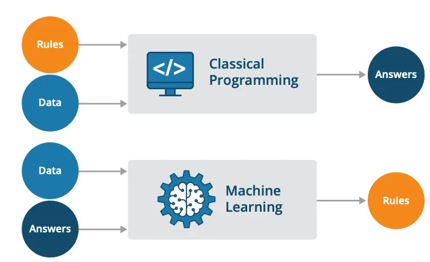

Machine learning komt neer op het achterhalen van het recept van de cocktail: je weet de ingrediënten, je krijgt de cocktails, maar je moet de exacte hoeveelheden proberen in te schatten. Keren we terug naar ons regressiemodel, dan kennen we de parameters $a$ en $b$ *niet* bij een machine learning probleem. Die parameters moeten we dus afleiden aan de hand van onze dataset.

Zoals de figuur hierboven toont, bestaat de input daarom uit data en antwoorden, en door een machine learning algoritme op die data en antwoorden toe te passen, krijgen we als output de regels of het model. Hier concreet moeten we dus de parameters $a$ en $b$ vinden, en dat doen we door een model te **trainen**. Eens we de "beste" waarden voor die parameters hebben gevonden, kunnen we het model gaan toepassen om voorspellingen te maken a.d.h.v. nieuwe data, zoals bij "klassiek" programmeren. Dit noemen we **inferentie**.

Hoe dat "trainen" gebeurt, en meer bepaald, hoe de "beste" parameters worden afgeleid, leggen we in deze notebook uit. Er zijn verschillende algoritmes mogelijk, ook bij lineaire regressie. We bespreken kort de exacte oplossingmethode, en daarna gaan we uitvoerig in op Gradient Descent, wat een echt leeralgoritme is.

### Voorbeeld

Nemen we de eenvoudige dataset uit het boek waarbij de onafhankelijke variabele $x$ het aantal kamers is van een huis, en de afhankelijke variabele $y$ de prijs van een huis:

In [ ]:
import pandas as pd

dataset = pd.DataFrame(dict(
    x=[1, 2, 3, 5, 6, 7],  # aantal kamers
    y=[155, 197, 244, 356, 407, 448]  # prijs
))

dataset

,x,y
0,1,155
1,2,197
2,3,244
3,5,356
4,6,407
5,7,448


Er zijn 6 datapunten of **examples** $(x_i, y_i)$ in onze dataset: (1, 155), (2, 197), (3, 244), (5, 356), (6, 407) en (7, 448).

Als we die punten plotten, dan zien we dat er inderdaad een lineair verband is, omdat de punten een rechte vormen:

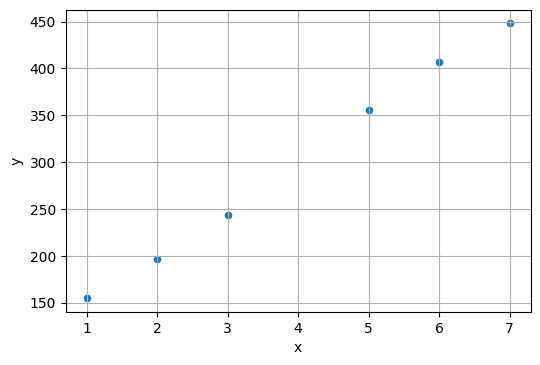

In [ ]:
dataset.plot.scatter(x='x', y='y');
plt.grid();

Maar dat verband is meestal niet 'perfect', zoals ook hier in dit voorbeeld: de punten liggen niet 'exact' op een rechte. Dus eigenlijk moeten we een **fout** of afwijking toevoegen aan ons model:

> $y_i = ax_i + b + \epsilon_i$

met $\epsilon_i$ de fout of de afwijking voor het $i$-de datapunt $(x_i, y_i)$.

Als we een voorspelling of **predictie** maken voor het $i$-de datapunt, dan berekenen we $\hat{y}_i$ als volgt:

> $\hat{y}_i = ax_i + b$

Uit de twee bovenstaande vergelijkingen volgt nu dat het verschil tussen de 'echte' waarde $y$, en de voorspelling $\hat{y}$ van het overeenkomstige punt op de rechte, gelijk is aan de fout $\epsilon$:

> $\epsilon_i = y_i - \hat{y}_i$

Stel dat we in ons voorbeeld $a = 50$ en $b = 100$ nemen, dan berekenen we de voorspellingen of predicties als volgt:

> $\hat{y}_i = 50x_i + 100$

We voegen die voorspellingen toe aan het dataframe en gebruiken hier `'yp'` als variabelenaam voor $\hat{y}$. We berekenen ook de afwijking.

In [ ]:
dataset['yp'] = 50 * dataset.x + 100  # voorspellingen
dataset['epsilon'] = dataset.y - dataset.yp  # afwijkingen
dataset

,x,y,yp,epsilon
0,1,155,150,5
1,2,197,200,-3
2,3,244,250,-6
3,5,356,350,6
4,6,407,400,7
5,7,448,450,-2


Laten we ook de regressielijn op de grafiek plotten, d.i. de rechte waarop de voorspellingen liggen:

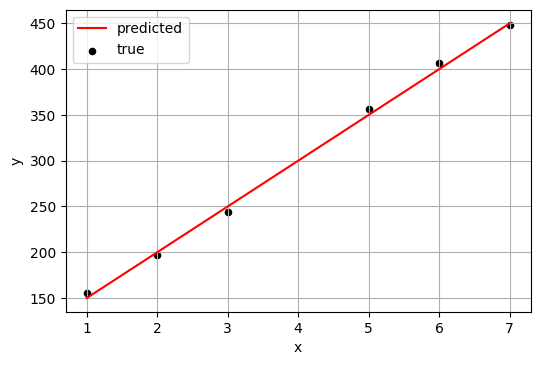

In [ ]:
fig, ax = plt.subplots()
dataset.plot.scatter(x='x', y='y', color='k', ax=ax);
dataset.plot(x='x', y='yp', linestyle='-', color='r', ax=ax);
plt.legend(['predicted', 'true']);
plt.grid();

Een veel voorkomende foute interpretatie is dat men een lineair verband gaat uitleggen als een causaal of oorzakelijk verband, d.i. een verband van oorzaak en gevolg, waarbij men de onafhankelijke variabele ziet als de oorzaak van de afhankelijke variabele. In ons voorbeeld zou dat betekenen dat de prijs van een huis het gevolg is van het aantal kamers. Dat zou kunnen, maar dat is niet wat ons model zegt. Het zegt enkel dat er een lineair verband is tussen het aantal kamers en de prijs van een huis. **Lineaire regressie drukt dus GEEN oorzakelijk verband uit!**

### Least squares

We hebben nu 'op zicht' een rechte opgegeven, maar in principe is het de bedoeling om de 'best passende' rechte te vinden. Dit is de rechte waarbij de fouten $\epsilon_i$ zo klein mogelijk zijn.

In theorie kunnen we dat probleem exact oplossen met de **kleinste-kwadratenmethode**, in het Engels **the method of least squares**. 'Exact' wil hier zeggen dat er een formule bestaat om parameters $a$ en $b$ te berekenen voor een gegeven dataset:

> $a = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$

> $b = \bar{y} - a \bar{x}$

met $n$ het totaal aantal datapunten, $\bar{x}$ het gemiddelde van alle $x_i$, en $\bar{y}$ het gemiddelde van alle $y_i$.

Passen we die formules toe op onze dataset, dan vinden we volgende waarden voor parameters $a$ en $b$:

In [ ]:
xm = dataset.x.mean()  # gemiddelde van x
ym = dataset.y.mean()  # gemiddelde van y

a = ((dataset.x - xm) * (dataset.y - ym)).sum() / ((dataset.x - xm) ** 2).sum()
b = ym - a * xm

print(f"intercept b = {b:.3f} en rico a = {a:.3f}")

intercept b = 99.595 en rico a = 50.393


Met onze eerste inschatting zaten we dicht bij de 'best passende' rechte, maar omdat we het toch niet helemaal correct hadden, berekenen we de voorspellingen en de bijhorende afwijkingen opnieuw:

In [ ]:
dataset['yp'] = a * dataset.x + b  # "beste" voorspellingen
dataset['epsilon'] = dataset.y - dataset.yp  # afwijkingen
dataset

,x,y,yp,epsilon
0,1,155,149.988095,5.011905
1,2,197,200.380952,-3.380952
2,3,244,250.773810,-6.773810
3,5,356,351.559524,4.440476
4,6,407,401.952381,5.047619
5,7,448,452.345238,-4.345238


Op de grafiek zullen we geen verschil zien met onze vorige figuur, maar toch gaan we ook de grafiek updaten door deze best passende rechte te plotten:

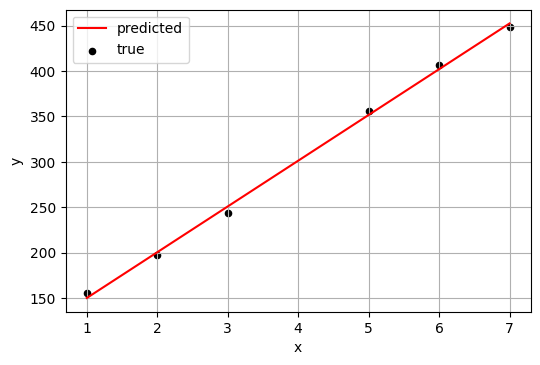

In [ ]:
fig, ax = plt.subplots()
dataset.plot.scatter(x='x', y='y', color='k', ax=ax);
dataset.plot(x='x', y='yp', linestyle='-', color='r', ax=ax);
plt.legend(['predicted', 'true']);
plt.grid();

### Error function

Hoe kunnen we nu weten hoe "goed" ons model is? Of m.a.w. hoe "dicht" onze rechte bij de datapunten ligt? Om dat te weten, moeten we een idee krijgen van de fout van het model. Daarvoor gebruiken we een error- of **lossfunctie**.

Eigenlijk willen we de totale fout weten, dus zouden we de som van alle afwijkingen $\epsilon_i$ kunnen berekenen:

> $L = \sum_{i=1}^{n}\epsilon_i = \sum_{i=1}^{n} (y_i - \hat{y}_i)$

met $L$ de lossfunctie die dus een idee moet geven van de totale fout van ons regressiemodel.

In [ ]:
print(f"De totale fout is {dataset.epsilon.sum():.5f}")

De totale fout is -0.00000


De gemiddelde afwijking is inderdaad nul, omdat we de parameters $a$ en $b$ onder die voorwaarde hebben afgeleid, maar de totale fout is uiteraard niet nul. Het probleem is dat positieve en afwijkingen elkaar opheffen. Dus in feite moeten we de absolute waarde nemen van de afwijkingen. De totale fout is dan de **som van de absolute waarden van de afwijkingen**:

> $L = \sum_{i=1}^{n} |\epsilon_i| = \sum_{i=1}^{n} |y_i - \hat{y}_i|$

In [ ]:
print(f"De totale fout is {dataset.epsilon.abs().sum() :.5f}")

De totale fout is 29.00000


Dat geeft ons inderdaad een correct idee van de totale fout. Interessant is ook om de gemiddelde absolute fout te berekenen door deze som te delen door het aantal datapunten:

> $L = \frac{1}{n}\sum_{i=1}^{n} |\epsilon_i| = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|$

Dit noemen we de **mean absolute error** (MAE).

In [ ]:
print(f"De MAE is {dataset.epsilon.abs().sum() / dataset.shape[0] :.5f}")

De MAE is 4.83333


Dat kunnen we natuurlijk eenvoudiger coderen door gebruik te maken van methode `mean`:

In [ ]:
MAE = dataset.epsilon.abs().mean()
print(f"De MAE is {MAE:.5f}")

De MAE is 4.83333


Het probleem met de absolute waarde is dat de afgeleide van die functie niet zo eenvoudig is. Daarom neemt men liever het kwadraat van de afwijkingen, dat er eveneens voor zorgt dat alle afwijkingen positief worden. Deze loss functie noemen we de **sum of squared errors** (SSE):

> $L = \sum_{i=1}^{n} \epsilon_i^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [ ]:
SSE = np.square(dataset.epsilon).sum()
print(f"De SSE is {SSE:.5f}")

De SSE is 146.51190


En ook hier kunnen we opnieuw het gemiddelde nemen ipv de som, wat dan de **mean squared error** (MSE) is:

> $L = \frac{1}{n}\sum_{i=1}^{n} \epsilon_i^2 = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [ ]:
MSE = np.square(dataset.epsilon).mean()
print(f"De MSE is {MSE:.5f}")

De MSE is 24.41865


Door het kwadrateren van de afwijkingen heeft de MSE niet meer dezelfde eenheid als de target. In ons voorbeeld gaat het om huisprijzen uitgedrukt in 1000 euro's. Door de afwijkingen te kwadrateren krijgt de MSE een eenheid van 1.000.000 vierkante euro's, wat voor ons moeilijk te interpreteren is. Daarom neemt men vaak de vierkantswortel van de MSE zodat de fout in dezelfde eenheid wordt uitgedrukt als de target. Deze metriek noemen we de **root mean square error** (RMSE):

In [ ]:
RMSE = np.sqrt(np.square(dataset.epsilon).mean())  # sqrt(MSE)
print(f"De RMSE is {RMSE:.5f}")

De RMSE is 4.94152


Een andere veel gebruikte metriek bij enkelvoudige lineaire regressie is de **determinatiecoëfficiënt $R^2$**. De $R^2$ score is een getal tussen 0 en 1, en hoe dichter bij 1, hoe beter het model de dataset heeft gefit. Eenvoudig gezegd geeft $R^2$ aan hoeveel percent van de data door het regressiemodel wordt verklaard. (In feite gaat het over het percentage van de variantie, maar dat zou ons hier te ver leiden.)

De exacte definitie van $R^2$ is:

> $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} = 1 - \frac{SSE}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

met $\bar{y}$ het gemiddelde van alle labels $y_i$. Wanneer we die formule toepassen, da krijgen we:

In [ ]:
R2 = 1 - (dataset.epsilon**2).sum() / np.square(dataset.y - ym).sum()
print(f"Determinatiecoëfficiënt R² is {R2:.5f}")

Determinatiecoëfficiënt R² is 0.99794


Zoals verwacht ligt de R² van ons regressiemodel zeer dicht bij 1 omdat het een zeer goeie fit is.

Tenslotte vermelden we hier ook nog een andere veel gebruikte coëfficiënt, de **correlatiecoëfficiënt van Pearson $R$**. Bij enkelvoudige lineaire regressie is het de vierkantswortel van de determinatiecoëfficiënt $R^2$. En meteen weet je ook waarom die laatste zo wordt genoteerd.

Zoals je weet kan die vierkantswortel zowel positief als negatief zijn. Maar welke moet je kiezen? Wel, als de rechte stijgend is, dan is $R$ positief, en anders neem je de negatieve. Hier hebben we een stijgende rechte, en dus is $R$ positief:



In [ ]:
print(f"Correlatiecoëfficiënt R is {np.sqrt(R2):.5f}")

Correlatiecoëfficiënt R is 0.99897



Zoals de naam het zegt, drukt de correlatiecoëfficiënt uit in welke mate twee variabelen zijn gecorreleerd, en bij enkelvoudige lineaire regressie is het dus een maat voor het lineaire verband tussen de onafhankelijke en de afhankelijke variabele. Het is een getal tussen -1 en 1, en we kunnen de absolute waarde van $R$ als volgt interpreteren:

- |R| = 0: geen lineair verband
- 0 < |R| < 0.2: nauwelijks lineair verband
- 0.2 < |R| < 0.4: zwak lineair verband
- 0.4 < |R| < 0.6: redelijk lineair verband
- 0.6 < |R| < 0.8: sterk lineair verband
- 0.8 < |R| < 1: zeer sterk lineair verband
- |R| = 1: perfect lineair verband

In de dagelijkse praktijk van de informatica zijn we vooral geïnteresseerd in absolute waarden voor $R$ groter dan 0.6.

We hebben er al op gewezen dat een correlatie geen oorzakelijk verband blootlegt. **Let ook op dat de afwezigheid van een lineair verband niet wil zeggen dat er geen verband is!** Dat zien we mooi op onderstaande figuur: je ziet verschillende puntenwolken met daarboven de waarde voor de correlatiecoëfficiënt. De onderste datasets hebben allemaal een $R$-waarde gelijk aan nul, want er is inderdaad geen lineair verband, maar wel duidelijk een ander verband!

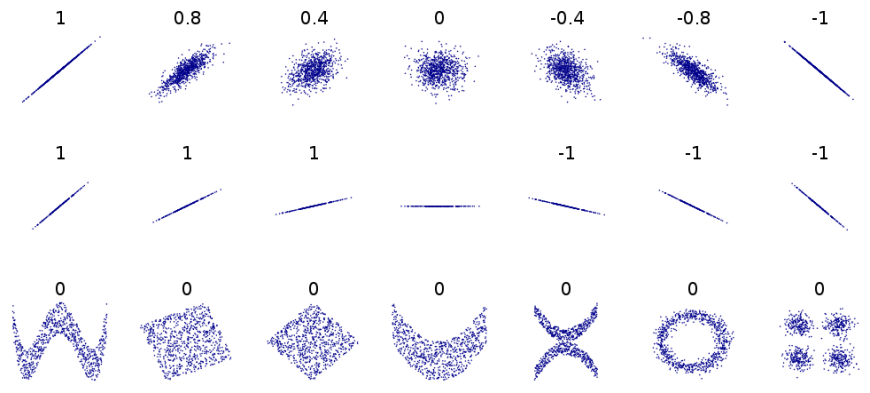

## Gradient Descent

De meeste problemen die we met machine learning gaan oplossen, zijn bijlange niet zo eenvoudig als enkelvoudige lineaire regressie. Meestal hebben we veel meer features waardoor het probleem niet meer tweedimensionaal maar N-dimensionaal is. En vaak is het probleem ook niet lineair. In dat geval hebben we een iteratief **leeralgoritme** nodig, want dat "leren" is uiteraard waar machine learning over gaat. **Gradient Descent** is zo'n algoritme.  

Bij supervised learning is het doel om de afwijking tussen labels en voorspellingen zo klein mogelijk te maken. In wiskundig jargon zegt men dat men de **lossfunctie** moet gaan **minimaliseren**. Die lossfunctie kunnen we vergelijken met een berglandschap waarin we het diepste dal willen vinden, want dat dal komt overeen met de kleinste totale fout.

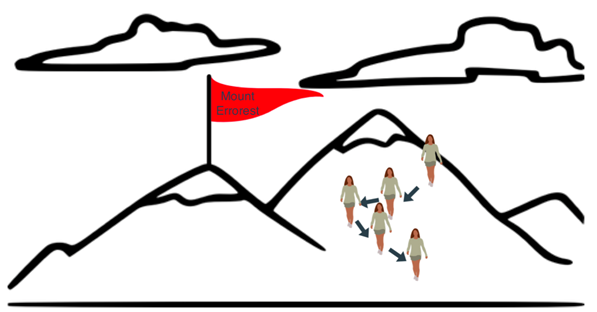

### De loss functie minimaliseren

In het geval van enkelvoudige lineaire regressie, hebben we 2 parameters en dus kunnen we "het berglandschap" nog voorstellen in een 3D assenstelsel. Hoe doen we dat? Wel, we berekenen de lossfunctie voor een range van waarden voor rico $a$ en intercept $b$. Die range bepalen we m.b.v. NumPy functie `linspace`. Als we de SSE als lossfunctie $L$ nemen, dan ziet onze code er als volgt uit:

In [ ]:
a_range = np.linspace(40, 60, 100)  # 100 waarden voor a tussen 40 en 60
b_range = np.linspace(50, 150, 100)  # 100 waarden voor b tussen 50 en 150

SSE = np.zeros((len(a_range), len(b_range)))  # matrix met SSE voor alle combinaties van a en b initialiseren

for irow, b in enumerate(b_range):
    for icol, a in enumerate(a_range):
        yp = a * dataset.x + b  # voorspellingen
        SSE[irow, icol] = ((dataset.y - yp)**2).sum()  # loss functie SSE

We maken nu een **contourplot** van de loss functie. Een contourplot kan je zien als een projectie van een 3D oppervlak op een horizontaal vlak, waarbij de punten die dezelfde hoogte hebben met elkaar worden verbonden. In ons voorbeeld verbindt de contourplot de punten met dezelfde waarde voor de SSE. Dit noemt men de **contourlijnen**. Vergelijk het met een landkaart waarop hoogtelijnen staan aangeduid.

In ons voorbeeld zijn de contourlijnen ellipsvormig. Om duidelijker te laten zien dat onze lossfunctie effectief een minimum heeft, nemen we de logartime van de SSE. Het oppervlak van de lossfunctie bevat dus inderdaad een "put" en dat is het punt waar de SSE minimaal is. We zien dat in dit punt $a$ ongeveer 50 is en $b$ ongeveer 100. Het exacte minimum dat we hierboven hebben berekend, wordt als een rode stip aangeduid.


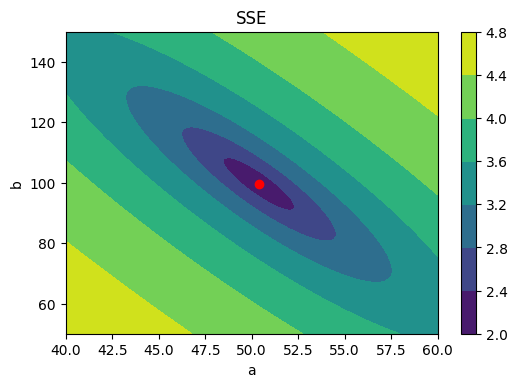

In [ ]:
plt.contourf(a_range, b_range, np.log10(SSE));  # contourplot van de logaritme van de SSE
plt.plot(50.393, 99.595, 'ro');  # exacte minimum plotten
plt.xlabel('a');
plt.ylabel('b');
plt.title('SSE');
plt.colorbar();

Op basis van al deze berekeningen kunnen we nu het punt $(a, b)$ bepalen met de kleinste waarde voor de SSE:

In [ ]:
irow, icol = np.unravel_index(np.argmin(SSE), SSE.shape)
print(f"({a_range[icol]:.4f}, {b_range[irow]:.4f})")

(50.5051, 99.4949)


We zitten er inderdaad heel dicht bij! Zo'n brute-force benadering is echter totaal niet praktisch en zelfs onmogelijk wanneer we te maken hebben met heel veel data die heel veel features bevatten die we willen fitten met een model met heel veel parameters. We gaan dus een intelligenter algoritme moeten toepassen, en dat algoritme noemt **Gradient Descent**.

We starten met een willekeurig punt op het berglandschap. In ons geval gaan we dus een willekeurige waarde voor parameters $a$ en $b$ bepalen. In dat punt zoeken we naar de richting waar de helling het steilst naar beneden gaat, en we zetten een klein stapje in die richting. Daar kijken we opnieuw waar de helling het steilst naar beneden gaat en we doen opnieuw een stapje naar beneden in die richting. En dat herhalen we zo vaak als nodig tot we het diepste dal in het berglandschap hebben bereikt. In dat punt vinden we de optimale waarden voor $a$ en $b$, en in ons geval komt dat overeen met de best passende rechte. Of anders gezegd, met het model dat de voorspellingen geeft met gemiddeld de kleinste afwijkingen.

Stel dat we één van de twee parameters al kennen, nl. intercept $b$. In dat geval wordt ons probleem ééndimensionaal, want we hebben slechts één onbekende parameter meer. We berekenen opnieuw de SSE voor een range van waarden voor $a$:

In [ ]:
a_range = np.linspace(40, 60, 100)  # 100 waarden voor a tussen 40 en 60
b_opt = 99.595  # we kennen hier reeds de optimale waarde van b

SSE = np.zeros(len(a_range))  # vector met SSE voor waarden van a initialiseren

for i, a in enumerate(a_range):
    yp = a * dataset.x + b_opt  # voorspellingen
    SSE[i] = ((dataset.y - yp)**2).sum()  # loss functie SSE

Op die manier maken we een verticale 2D doorsnede door ons berglandschap ter hoogte van $b = 99.595$. Ons berglandschap wordt in dit geval gereduceerd tot een kromme met een put die we in een 2D assenstelsel kunnen tekenen:

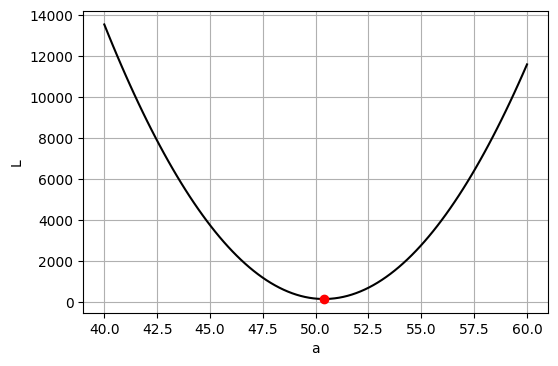

In [ ]:
plt.plot(a_range, SSE, 'k-');
yp = a * dataset.x + b  # voorspellingen
a_opt = 50.393  # de optimale waarde voor a
SSE_min = ((dataset.y - (a_opt * dataset.x + b_opt))**2).sum()  # de minimale SSE
plt.plot(a_opt, SSE_min, 'ro');  # exacte minimum plotten
plt.xlabel('a');
plt.ylabel('L');  # L is de loss functie die hier de SSE is
plt.grid();

### De gradiënt

In twee dimensies is de gradiënt van een kromme de afgeleide van de functie die deze kromme beschrijft. De afgeleide in een punt op die kromme is eigenlijk de helling van de raaklijn aan de kromme in dat punt. Dat hebben we uitvoerig in het eerste hoofdstuk besproken.

De helling van de kromme in een bepaald punt van die kromme gaan we dus inschatten op basis van de afgeleide van de loss functie naar parameter $a$, wat we noteren als $\frac{\delta L}{\delta a}$. In deze versie van Gradient Descent gaan we die afgeleide berekenen op basis van een willekeurig datapunt $i$. Om de afgeleide te berekenen, moeten we de kettingregel toepassen:

> $\frac{\delta L}{\delta a} = 2 (y_i - \hat{y}_i) (-x_i)$

De raaklijn is nu een rechte waarvan we de helling of rico kunnen berekenen en natuurlijk kennen we ook het punt $(L_0, a_0)$ dat op die rechte ligt. Als we de rico en één punt van een rechte kennen, dan kunnen we de vergelijking van die rechte opstellen. In dit geval:

> $L = L_0 + \frac{\delta L}{\delta a}(a-a_0)$

Subscript $0$ verwijst in dit geval naar de initiële waarden van $a$ en $L$.

Laten we dat eens demonstreren met een eenvoudig voorbeeld. Nemen we het 3e datapunt in de dataset, nl. (3, 244). Om het concept van de raaklijn mooi te kunnen illustreren, beperken we onze dataset hier nu even tot dat ene punt. Dat betekent dat onze loss functie $L$ de squared error is van dat punt voor alle mogelijke waarden van $a$ (want we stellen nog altijd $b$ gelijk aan de optimale waarde):

In [ ]:
a_range = np.linspace(40, 56, 100)  # a laten variëren tussen 40 en 56
i = 2  # derde datapunt
x, y = dataset.x[i], dataset.y[i]
L = (y - (a_range * x + b_opt)) ** 2  # squared error

Uiteraard kunnen we in het geval van 1 datapunt een perfecte fit bekomen:

> $y_i = ax_i + b$

Aangezien $b$ gekend is, volgt uit deze vergelijking dat:

> $a = \frac{y_i - b}{x_i}$

De optimale waarde voor $a$ is niet meer gelijk aan 50.4 wanneer we de dataset beperken tot het derde punt:

In [ ]:
print((y - b_opt) / x)

48.135


De bijhorende minimale fout is hier uiteraard gelijk aan 0, omdat we één punt perfect kunnen fitten. Maar om het Gradient Descent algoritme te demonstreren, gaan we het probleem toch eens iteratief oplossen. We starten in een willekeurig punt, hier bijv. $a_0 = 45$. De loss functie $L_0$ is de squared error van het derde datapunt, berekend met $a_0$:

In [ ]:
a0 = 45
L0 = (y - (a0 * x + b_opt))**2  # squared error
print(f"(a0, L0) = ({a0:.1f},{L0:.1f})")

(a0, L0) = (45.0,88.5)


We berekenen nu de afgeleide in het punt (45.0, 88.5):

In [ ]:
delta = -2 * (y - (a0 * x + b_opt)) * x  # afgeleide van L naar a in a0
print('rico van de raaklijn is:', delta)

rico van de raaklijn is: -56.43000000000001


De vergelijking van de raaklijn is dus:

> $L = 88.5 - 56.43 (a - 45)$

We tekenen nu de raaklijn van $a=42$ tot $a=48$, zodat ons punt $(a_0, L_0)$ mooi in het midden ligt:

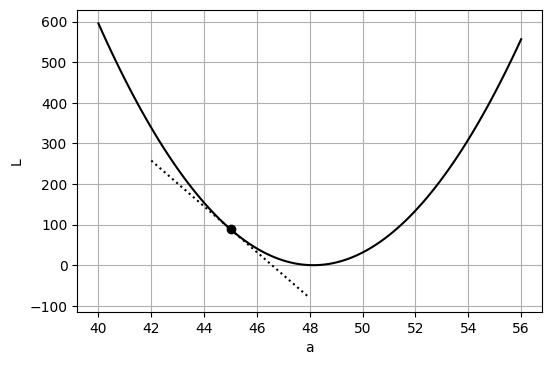

In [ ]:
plt.plot(a_range, L, 'k-');
plt.xlabel('a');
plt.ylabel('L');  # L is de loss functie die hier de SSE is

# raaklijn
a_raaklijn = np.array([42, 48])
L_raaklijn = L0 + delta * (a_raaklijn - a0)
plt.plot(a0, L0, 'ko');
plt.plot(a_raaklijn, L_raaklijn, 'k:');
plt.grid();

De parameter $a_0$ passen we nu aan door een kleine fractie van de helling van de raaklijn ervan af te trekken:

> $a_1 = a_0 - \alpha \frac{\delta L}{\delta a}$

met $\alpha$ de **learning rate** waarmee we de grootte van onze stappen kunnen regelen. Stel dat we die learning rate hier gelijk nemen aan 0.025, dan wordt $a_1$:

In [ ]:
alpha = 0.025
a1 = a0 - alpha * delta
print(f"a1 = {a1}")

a1 = 46.41075


We zien dat de nieuwe waarde voor $a$ inderdaad groter wordt en zo opschuift naar het minimum. De error wordt daardoor ook kleiner, net als de afgeleide, omdat de kromme minder steil wordt naarmate we dichter komen van het minimum:

In [ ]:
# L1 en afgeleide delta berekenen
L1 = (y - (a1 * x + b_opt)) ** 2  # squared error
print(f"(a1, L1) = ({a1:.1f},{L1:.1f})")
delta = -2 * (y - (a1 * x + b_opt)) * x  # afgeleide van L naar a in a1
print('rico van de raaklijn is:', delta)

(a1, L1) = (46.4,26.8)
rico van de raaklijn is: -31.036500000000046


We visualiseren dit alles door opnieuw de loss functie te plotten met daarop het nieuwe punt $(a_1, L_1)$ aangeduid en de raaklijn in dat punt:

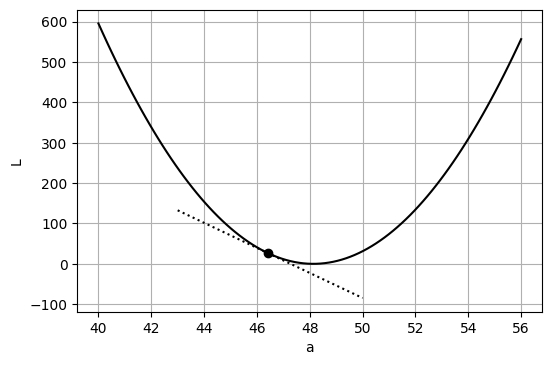

In [ ]:
# plot van a vs L
plt.plot(a_range, L, 'k-');
plt.xlabel('a');
plt.ylabel('L');  # L is de loss functie die hier de SSE is
plt.grid();

# raaklijn
a_raaklijn = np.array([43, 50])
L_raaklijn = L1 + delta * (a_raaklijn - a1)
plt.plot(a1, L1, 'ko');
plt.plot(a_raaklijn, L_raaklijn, 'k:');

We zien inderdaad dat de raaklijn platter wordt. In het minimum van de functie is de raaklijn zelfs perfect horizontaal, en dus is de afgeleide daar nul. In dit eenvoudige voorbeeld met 1 parameter en 1 datapunt kunnen we rechtstreeks het minimum bepalen door de afgeleide gelijk te stellen aan nul:

> $\frac{\delta L}{\delta a} = 2 (y_i - \hat{y}_i) (-x_i) = 0$

waaruit volgt dat:

> $a_{opt} = \frac{y_i - b_{opt}}{x_i}$

Dat is inderdaad de oplossing die we eerder al hadden afgeleid:

In [ ]:
a_opt = (y - b_opt) / x
print(a_opt)

48.135


Laten we tenslotte ook de grafiek plotten voor deze optimale waarde:

(a_opt, L_min) = (48.1,0.0)
rico van de raaklijn in het minimum is: -0.0


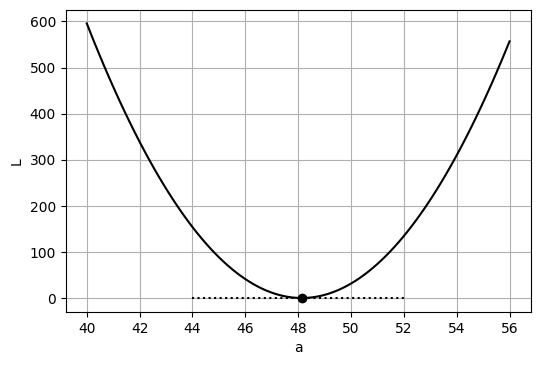

In [ ]:
# L en afgeleide delta berekenen in het minimum
L_opt = (y - (a_opt * x + b_opt))**2
print(f"(a_opt, L_min) = ({a_opt:.1f},{L_opt:.1f})")
delta = -2 * (y - (a_opt * x + b_opt)) * x
print('rico van de raaklijn in het minimum is:', delta)

# plot van a vs L
plt.plot(a_range, L, 'k-');
plt.xlabel('a');
plt.ylabel('L');  # L is de loss functie die hier de SSE is
plt.grid();

# raaklijn
a_raaklijn = np.array([44, 52])
L_raaklijn = L_opt + delta * (a_raaklijn - a_opt)
plt.plot(a_opt, L_opt, 'ko');
plt.plot(a_raaklijn, L_raaklijn, 'k:');

We zien inderdaad dat de raaklijn perfect horizontaal is.

Dit voorbeeld laat ook duidelijk zien wat de rol van de learning rate is. Als we die zeer klein nemen, dan nemen we heel kleine stapjes en dan zal het lang duren vooraleer we het minimum bereiken, misschien zelfs te lang. Maar we mogen de learning rate ook niet te groot nemen, want als we te grote stappen nemen, dan passeren we het minimum, wat we **overshooting** noemen, en zo raken we alsmaar verder van het minimum verwijderd. Starten we opnieuw bij $a=45$, maar nemen we deze keer de learning rate gelijk aan 1:

In [ ]:
alpha = 1
delta = -2 * (y - (a0 * x + b_opt)) * x
a1 = a0 - alpha * delta
print(f"a1 = {a1}")

a1 = 101.43


We "schieten" hier inderdaad ver voorbij het minimum... We zeggen dat in dit geval het algoritme **divergeert**. Wanneer het algoritme wel steeds dichter van het minimum komt, dan spreken we van **convergentie**.

### Het algoritme

In het voorbeeldje hebben we eigenlijk het algoritme al gedemonstreerd voor het optimaliseren van parameter $a$ (waarbij we parameter $b$ constant hebben gehouden) o.b.v. 1 datapunt (waarbij we de andere datapunten genegeerd hebben). We kunnen uiteraard parameter $b$ op dezelfde manier gaan mee optimaliseren. Alleen is de partiële afgeleide een beetje anders:

> $\frac{\delta L}{\delta b} = 2 (y_i - \hat{y}_i) (-1)$

Als we alle datapunten in rekening willen brengen, dan gaan we de gradiënt toch maar benaderen a.d.h.v. 1 datapunt, maar we doorlopen wel achtereenvolgens alle datapunten. De volgorde waarin we de datapunten doorlopen is willekeurig, en wanneer we ze één keer allemaal doorlopen hebben, dan noemen we dat een **epoch**. Om nu het minimum te vinden moeten we meestal vele epochs uitvoeren.  

Parameters $a$ en $b$ moeten we dus op het einde van elke iteratie als volgt aanpassen:

> $a_{new} = a - \alpha \frac{\delta L}{\delta a} = a + \alpha (y_i - \hat{y}_i)x_i$

> $b_{new} = b - \alpha \frac{\delta L}{\delta b} = b + \alpha (y_i - \hat{y}_i)$

We zien dat de constante gelijk aan 2 in de uitdrukking van de afgeleiden wordt opgenomen in de learning rate. Dat is ok omdat ook de learning rate een constante is. Om het wiskundig correct te houden, deelt men ook soms de SSE door 2 bij het definiëren van de loss functie.

Het **Gradient Descent algoritme** werkt dus als volgt:

Gegeven:
- een dataset met $n$ datapunten $(x_i, y_i)$
- het aantal epochs $n_{epochs}$
- de learning rate $\alpha$

Stappen:

0. Initialiseer parameters $a$ en $b$ met willekeurige waarden

1. Herhaal $n_{epochs}$ keer:
    2. Herhaal $n$ keer:
        3. Selecteer een willekeurig datapunt $(x_i, y_i)$ uit de dataset (zonder teruglegging!)
        4. Bereken de voorspelling $\hat{y}_i = ax_i + b$
        5. Bereken de afwijking $\epsilon_i = y_i - \hat{y}_i$, en vermenigvuldig de afwijking met de learning rate: $\delta_i = \alpha \epsilon_i$
        6. Pas parameters $a$ en $b$ aan a.d.h.v. de afwijking:
            - $a_{new} = a + \alpha (y_i - \hat{y}_i) x_i = a + \delta_i x_i$
            - $b_{new} = b + \alpha (y_i - \hat{y}_i) = b + \delta_i$

We implementeren het algoritme in een functie. Het is ook gebruikelijk om na elke epoch de loss functie te berekenen en bij te houden. We nemen de SSE als loss functie:

In [ ]:
from random import shuffle

def gradient_descent(x, y, n_epochs, alpha):
    """Gradient Descent algoritme voor enkelvoudige lineaire regressie
    Inputparameters:
    - x: array met waarden van de onafhankelijke variabele of de feature (lengte is n)
    - y: array met waarden van de afhankelijke variabele of het label (lengte is n)
    - n_epochs: integer die het aantal epochs bepaalt
    - alpha: float die de learning rate bepaalt
    Return values:
    - a: array met de rico afgeleid na elke iteratie (lengte is dus n_epochs * n)
    - b: array met de intercept afgeleid na elke iteratie (lengte is dus n_epochs * n)
    - L: array met SSE berekend na elke epoch (lengte is dus n_epochs)
    De optimale waarden voor rico en intercept zijn dus a[-1] en b[-1],
    en de bijhorende SSE is L[-1]"""

    # initialiseren
    a, b = np.random.rand(), np.random.rand()
    a_path, b_path = [], []  # we gaan alle waarden van a en b bijhouden
    L = []  # loss functie
    idx = list(range(len(x)))  # indices van de datapunten

    # buitenste lus: epochs
    for _ in range(n_epochs):
        shuffle(idx)  # indices shuffelen
        # binnenste lus: datapunten willekeurig doorlopen
        for i in idx:
            yp = a * x[i] + b  # voorspelling
            delta = alpha * (y[i] - yp)  # learning rate x afwijking
            a += delta * x[i]  # rico aanpassen
            b += delta  # intercept aanpassen
            a_path.append(a)
            b_path.append(b)

        # loss functie: SSE
        L.append(np.sum((y - (a * x + b)) ** 2))

    # output
    return np.array(a_path), np.array(b_path), np.array(L)

Merk op dat we ook alle tussentijdse waarden van $a$ en $b$ bijhouden. Op die manier kunnen we het traject dat het Gradient Descent algoritme volgt gaan tekenen op de contourplot.

Laten we nu het algoritme uittesten op onze dataset:

In [ ]:
x, y = dataset.x.values, dataset.y.values
a_path, b_path, loss = gradient_descent(x, y, n_epochs=500, alpha=0.01)
print(a_path[-1], b_path[-1])

50.60133281078264 99.59782496977148


We komen heel dicht bij het correcte minimum dat we daarnet exact hebben berekend a.d.h.v. de least squares methode. We merken wel dat we genoeg epochs moeten nemen. De parameters $n_{epochs}$ en $\alpha$ noemen we **hyperparameters**, omdat die niet door het algoritme worden afgeleid, maar worden opgegeven door de gebruiker.

Laten we ook eens het verloop van de loss functie bekijken:

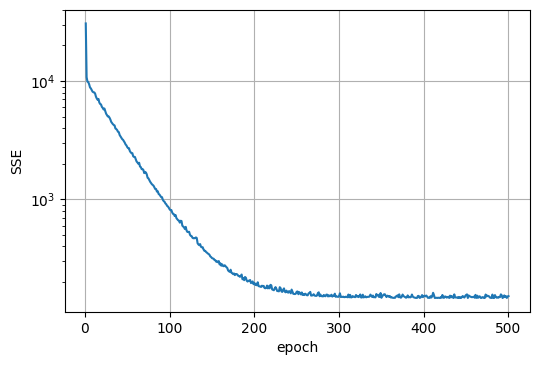

In [ ]:
plt.semilogy(np.arange(1, len(loss)+1), loss);
plt.xlabel('epoch');
plt.ylabel('SSE');
plt.grid();

Uiteraard wordt de loss functie nooit nul, maar na 400 epochs zien we niet meer veel verbetering.

Tenslotte maken we nog eens de contourplot, en deze keer voegen we er het pad aan toe dat Gradient Descent heeft gevolgd vanaf de beginwaarden voor $a$ en $b$ tot aan het minimum:

In [ ]:
a_range = np.linspace(0, 100, 100)
b_range = np.linspace(0, 200, 100)

SSE = np.zeros((len(a_range), len(b_range)))  # matrix met SSE voor alle combinaties van a en b initialiseren

for irow, b in enumerate(b_range):
    for icol, a in enumerate(a_range):
        yp = a * dataset.x + b  # voorspellingen
        SSE[irow, icol] = ((dataset.y - yp)**2).sum()  # loss functie SSE

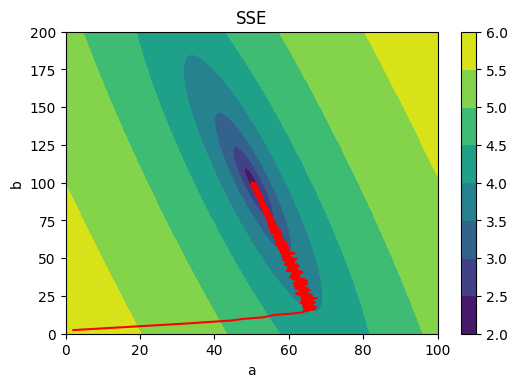

In [ ]:
plt.contourf(a_range, b_range, np.log10(SSE));  # contourplot van de logaritme van de SSE
plt.xlabel('a');
plt.ylabel('b');
plt.title('SSE');
plt.colorbar();
plt.plot(a_path, b_path, 'r-');  # het pad van Gradient Descent plotten
plt.xlim(a_range[[0, -1]]);
plt.ylim(b_range[[0, -1]]);

Het algoritme start helemaal links onderaan in een willekeurig punt $(a_0, b_0)$ en gaat inderdaad stap voor stap de helling af richting minimum. Bij het afdalen zigzagt het algoritme omdat we de gradiënt niet exact berekenen, maar telkens benaderen o.b.v. slechts 1 datapunt.

In het algoritme hebben we de parameters $a$ en $b$ willekeurig geïnitialiseerd. We hebben ook de datapunten willekeurig doorlopen. Daarom noemen we dit algoritme **Stochastic Gradient Descent** (SGD). Stochastisch wil zeggen dat het algoritme elementen van willekeurigheid of 'randomness' bevat, wat hier dus effectief het geval is.

We kunnen de gradiënt ook o.b.v. alle punten in de dataset bepalen. In dit geval spreken we van **(Full) Batch Gradient Descent**. Dit algoritme heeft het voordeel dat het vaak sneller en stabieler is, maar het moet wel de volledige dataset in het RAM-geheugen kunnen vasthouden, en dat is bij grote datasets niet mogelijk. Een compromis tussen beiden is om met zogenaamde mini-batches te werken: men bepaalt de gradiënt o.b.v. enkele datapunten die men ook willekeurig groepeert. Dit algoritme noemt men **Mini-Batch Gradient Descent**. De grootte van zo'n batch is constant. Deze **batch size** is ook een hyperparameter die door de gebruiker wordt opgegeven. Meestal neemt men een macht van twee, bv. 32.

## Scikit Learn

Lineaire regressie zit ingebouwd in Scikit Learn:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Eerst moeten we de klasse `LinearRegression` van de module `linear_model` importeren. Merk op dat Scikit Learn zelf als `sklearn` moet geïmporteerd worden.

Daarna instantiëren we de klasse `LinearRegression` en we roepen de `fit` methode aan van het gecreëerde object, waarbij we de `x` en de `y` waarden van onze dataset meegeven. Let op! De methode kan ook meerdere features aan en daarom moet inputargument `X` een 2D matrix zijn. Vandaar dat we een extra 'axis' toevoegen aan `x` m.b.v. `np.newaxis`:

In [ ]:
from sklearn.linear_model import LinearRegression

x, y = dataset.x.values, dataset.y.values

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)

LinearRegression()

Merk op dat we geen learning rate of het aantal epochs moeten doorgeven aan de `fit` methode omdat die methode gebruik maakt van de kleinste-kwadratenmethode, in het Engels **Ordinary Least Squares** (OLS).

De afgeleide parameters vinden we terug in attributen `coef_`, wat de rico is, en `intercept_`:

In [ ]:
print(f"rico = {lr.coef_[0] :.2f}, intercept = {lr.intercept_ :.2f}")

rico = 50.39, intercept = 99.60


Attribuut `coef_` is een array, omdat we in het algemeen $N$ coëfficiënten afleiden als er $N$ features zijn. Bij lineaire regressie hebben we inderdaad $N+1$ parameters als er $N$ features zijn. Hier hebben we maar 1 feature, dus krijgen we ook maar 1 coëfficiënt, de rico. Maar in totaal hebben we 2 parameters: rico en intercept.

Stel dat er 2 features $x_1$ en $x_2$ zijn en 1 label $y$, dan fitten we de data a.d.h.v. een 2D vlak met de algemene vergelijking:

> $y = a_0 + a_1x_1 + a_2x_2$

De intercept is hier $a_0$ en in dit geval zijn er twee coëfficiënten $a_1$ en $a_2$. In totaal hebben we dus inderdaad 3 parameters die moeten geoptimaliseerd worden.

We kunnen dus ook veralgemenen naar $N$ features. Zoals we al hebben gezien krijgen we dan de volgende vergelijking:

> $y = a_0 + a_1 x_{1} + a_2 x_{2} + ... + a_N x_{N}$

Dit is de vergelijking van een hypervlak in $N+1$ dimensies met evenveel parameters. Dat hypervlak kunnen we niet meer grafisch voorstellen, maar we kunnen wel 2D of 3D doorsnedes door dat hypervlak plotten. In de oefeningen gaan we lineaire regressie toepassen op een dataset met meer dan 1 feature.

Met de methode `predict` kunnen we nu voorspellingen maken, bijv. voor een huis met 4 kamers:

In [ ]:
lr.predict([[4]])

array([301.16666667])

Ook hier moeten we $x=4$ in een 2D array stoppen, vandaar de dubbele vierkante haakjes.

Tenslotte is er ook een methode `score` die de determinatiecoëfficiënt of $R^2$ geeft:

In [ ]:
lr.score(x[:, np.newaxis], y)

0.9979437166148433

Deze score hadden we zelf ook al berekend. Herinner dat de $R^2$ score een getal tussen 0 en 1 is, en hoe dichter bij 1, hoe beter het model de dataset heeft gefit. We rekenen de R² score zelf ook nog eens uit met de volgende formule:

> $R^2 = 1 - \frac{SSE}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [ ]:
yp = lr.predict(x[:, np.newaxis])
SSE = np.square(yp - y).sum()
R2 = 1 - SSE / np.square(y - y.mean()).sum()
print(f"R² = {R2:.5f}")

R² = 0.99794


Tenslotte is het ook interessant om weten dat Scikit Learn ook de functies `mean_absolute_error` en `mean_squared_error` voorziet om de MAE en de MSE te berekenen:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_true=y, y_pred=yp)
MSE = mean_squared_error(y_true=y, y_pred=yp)

print(f"De MAE is {MAE:.5f}")
print(f"De MSE is {MSE:.5f}")


De MAE is 4.83333
De MSE is 24.41865


We krijgen dezelfde waarden als we eerder zelf hadden berekend. Merk op dat deze functies deel uitmaken van de Scikit Learn module `sklearn.metrics`, omdat we de MAE en MSE ook wel **evaluatiemetrieken** noemen. Ze worden immers gebruikt om op een objectieve manier te evalueren hoe goed een model presteert. De MAE en MSE zijn veel gebruikte evaluatiemetrieken bij regressieproblemen. Verder in de cursus zullen we nog andere evaluatiemetrieken bespreken, o.a. voor het uitvoeren van classificatietaken, waarbij de nauwkeurigheid (of accuracy in het Engels) een veel gebruikte evaluatiemetriek is.

---



---
## BRONNEN
*  Handboek: Grokking Machine Learning (version 12), Manning Early Access Program, by Luis G. Serrano, 2020.
*  Hoofdstuk "Correlatie en regressie", Cursus Data Science I, Opleiding professionele bachelor Toegepaste Informatica, Karel de Grote Hogeschool, opgesteld door K. Demuynck, 2018.
*  https://nl.wikipedia.org/wiki/Gradi%C3%ABnt
*  https://nl.wikipedia.org/wiki/Gradi%C3%ABnt_(wiskunde)
*  https://en.wikipedia.org/wiki/Least_squares
*  http://www.personal.psu.edu/sxj937/Notes/Tangent_Planes_and_Linear_Approximations.pdf
*  https://nl.wikipedia.org/wiki/Determinatieco%C3%ABffici%C3%ABnt
*  https://nl.wikipedia.org/wiki/Correlatieco%C3%ABffici%C3%ABnt
*  https://www.knowledgehut.com/blog/data-science/interpret-r-squared-and-goodness-fit-regression-analysis
*  https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a
*  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
*  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html